PdDistrict
BAYVIEW       13681
CENTRAL       14067
INGLESIDE     11881
MISSION       18190
NORTHERN      16331
PARK           7610
RICHMOND       6850
SOUTHERN      24458
TARAVAL       10207
TENDERLOIN    12860
Name: MaxCrimeCount, dtype: int64


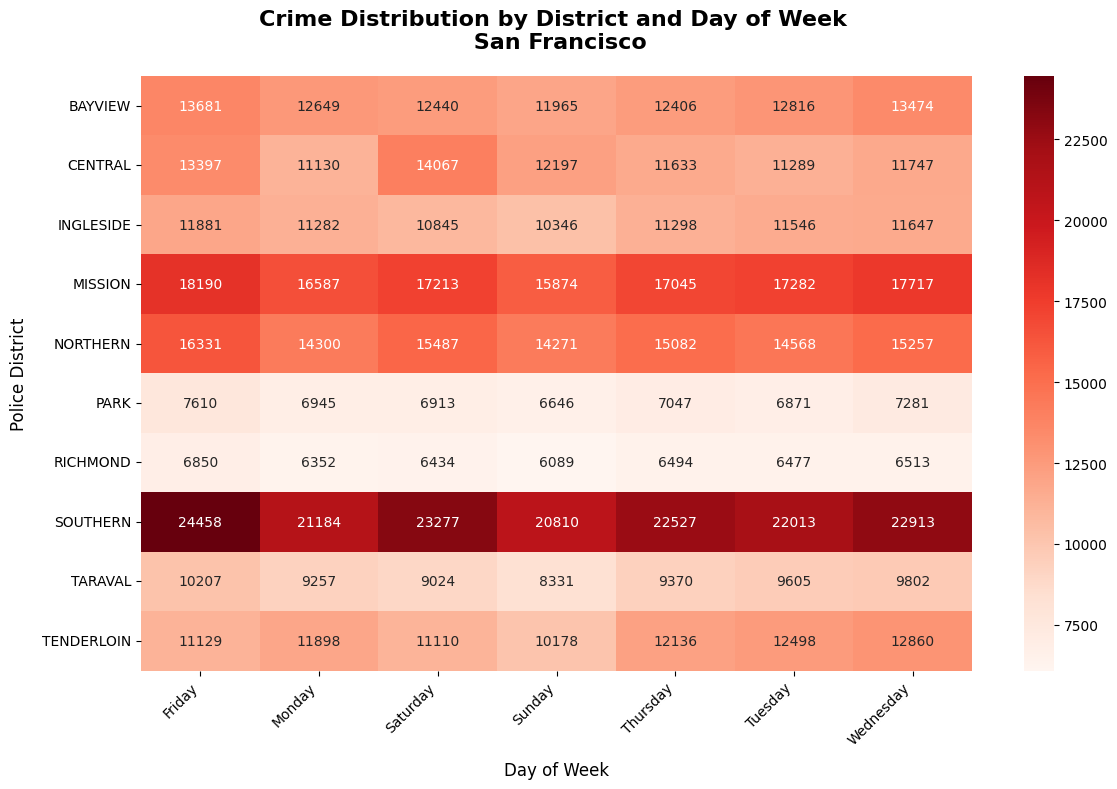

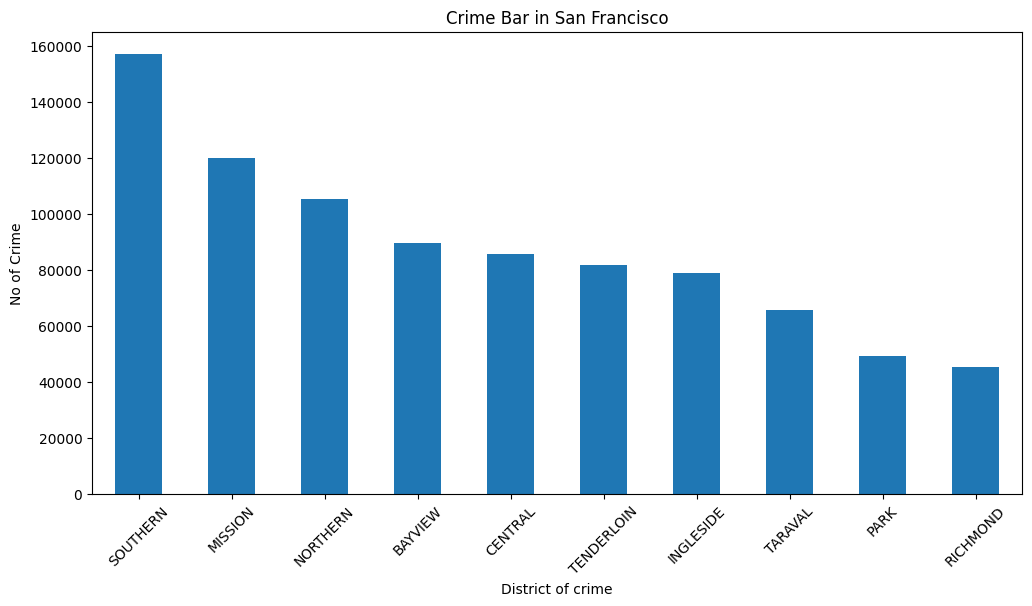

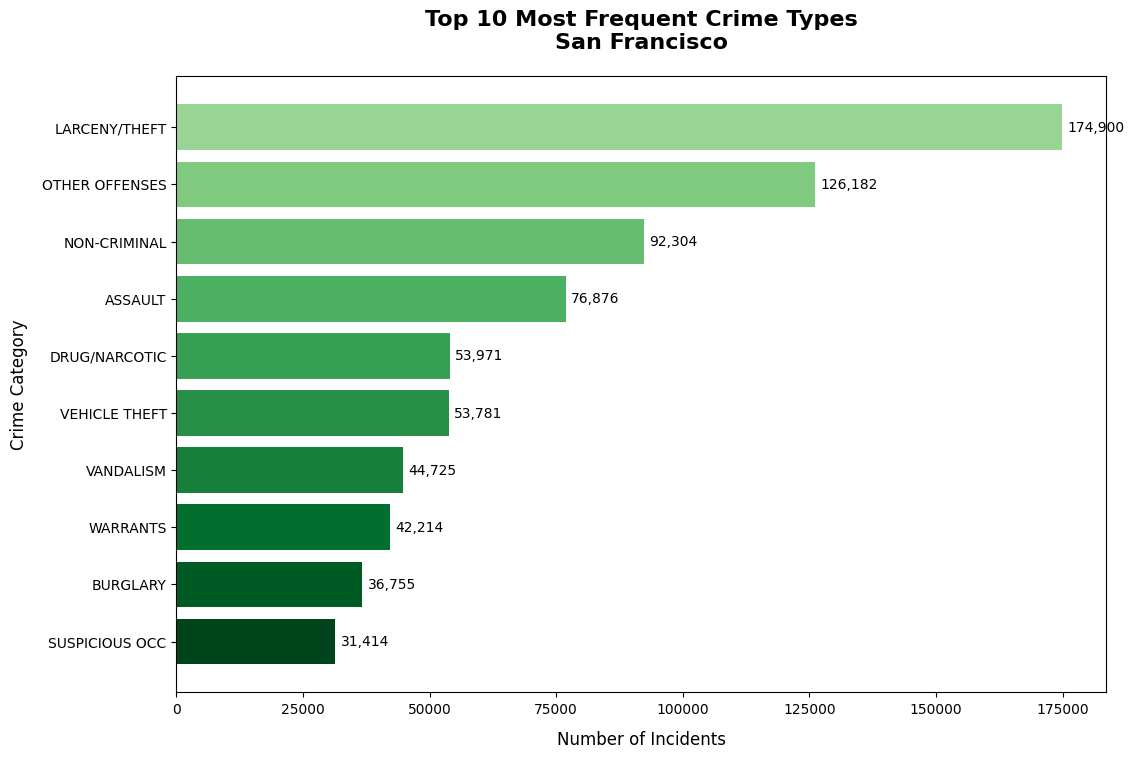

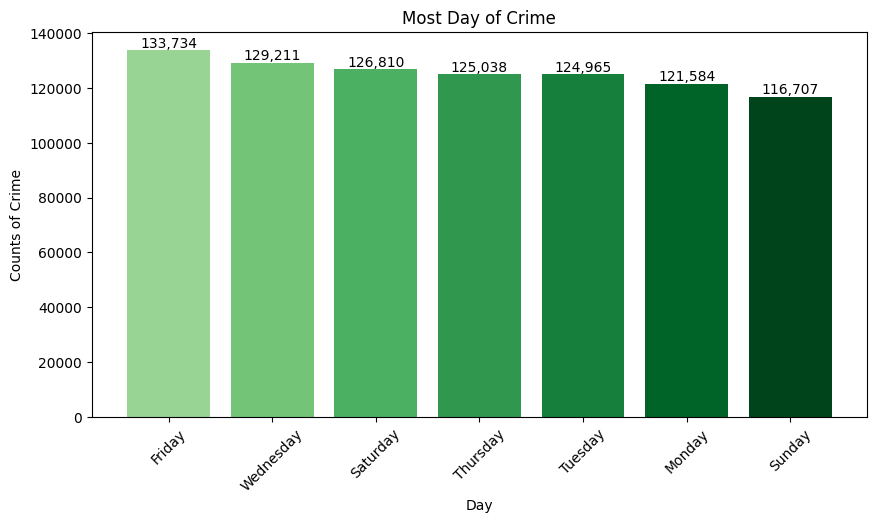

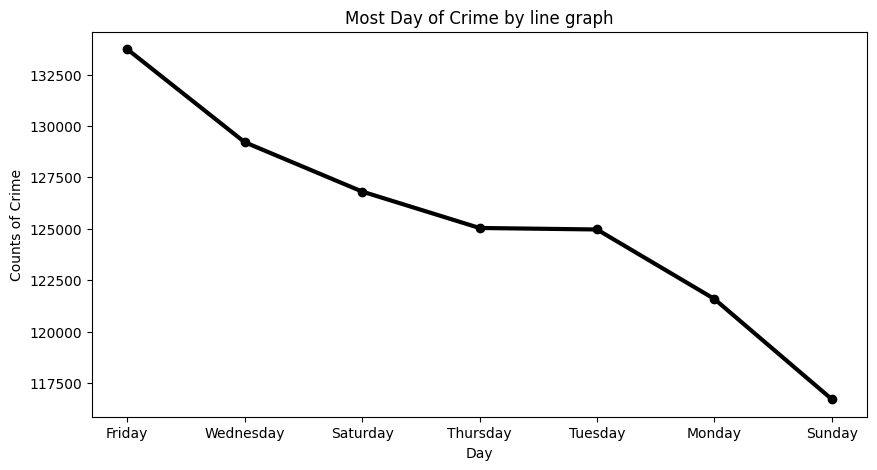

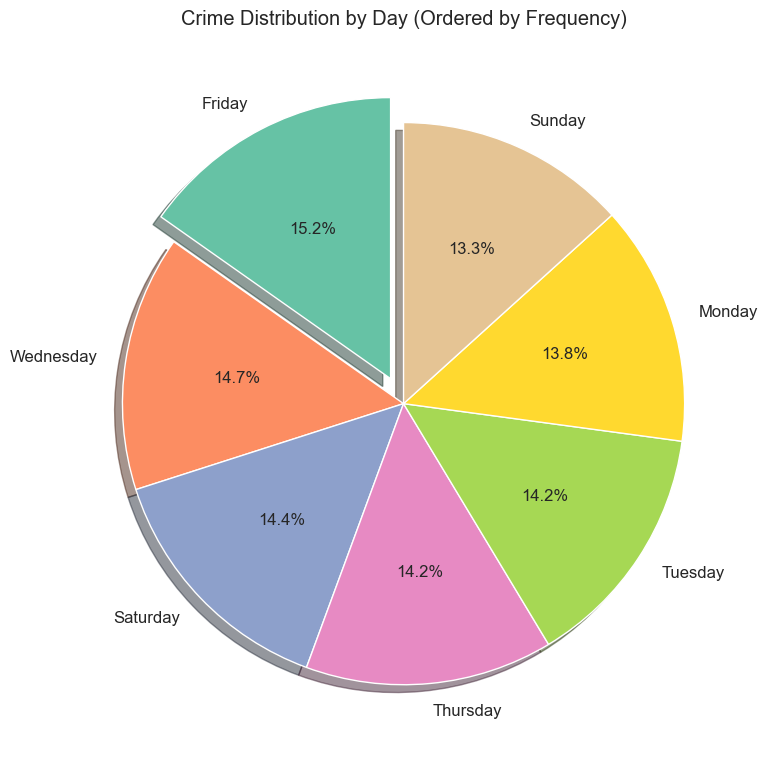

In [6]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%run "EDA_Collection.ipynb"
df = pd.DataFrame(data)

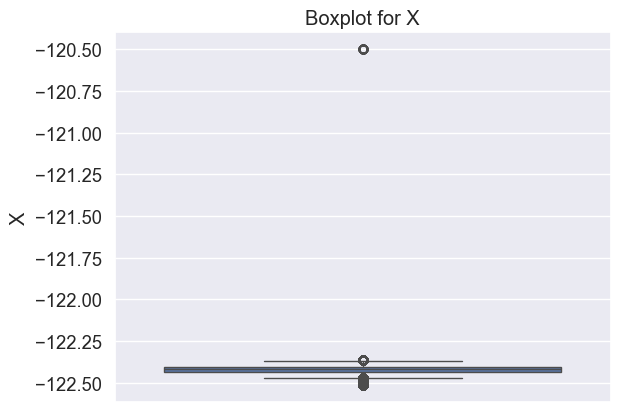

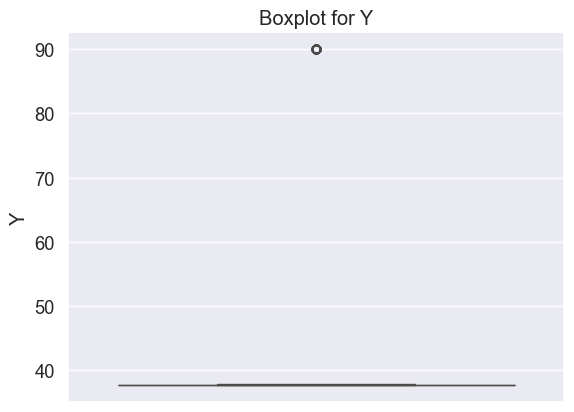

In [7]:

df.head()
# We Will Use Nemrical To Find Outliers
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
for col in numerical_cols:
    sns.boxplot(data=df , y=col)
    plt.title(f'Boxplot for {col}')
    plt.show()


In [8]:
def remove_outliers_iqr(df , column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound =  Q1 - 1.5 * IQR
    upper_bound =  Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] >= upper_bound)]

def removal_box_plot(df):
    for col in numerical_cols:
        df = remove_outliers_iqr(df, col)
    return df
df_clean = removal_box_plot(df)
df_clean

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
1123,2015-05-03 23:18:00,SUSPICIOUS OCC,SUSPICIOUS ACT TOWARDS FEMALE,Sunday,SOUTHERN,NONE,200 Block of INTERSTATE80 HY,-122.365565,37.809671
1275,2015-05-03 16:15:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,SOUTHERN,NONE,200 Block of INTERSTATE80 HY,-122.365565,37.809671
1280,2015-05-03 16:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,SOUTHERN,NONE,200 Block of INTERSTATE80 HY,-122.365565,37.809671
1323,2015-05-03 13:15:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Sunday,SOUTHERN,NONE,200 Block of INTERSTATE80 HY,-122.365565,37.809671
1651,2015-05-02 17:00:00,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Saturday,SOUTHERN,NONE,200 Block of INTERSTATE80 HY,-122.365565,37.809671
...,...,...,...,...,...,...,...,...,...
873949,2003-01-22 23:50:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,SOUTHERN,"ARREST, CITED",200 Block of I-80,-122.364937,37.810204
874328,2003-01-22 09:30:00,NON-CRIMINAL,LOST PROPERTY,Wednesday,SOUTHERN,NONE,200 Block of I-80,-122.364937,37.810204
874528,2003-01-21 18:00:00,MISSING PERSON,MISSING JUVENILE,Tuesday,SOUTHERN,LOCATED,200 Block of I-80,-122.364937,37.810204
874598,2003-01-21 15:30:00,MISSING PERSON,MISSING JUVENILE,Tuesday,SOUTHERN,NONE,200 Block of I-80,-122.364937,37.810204


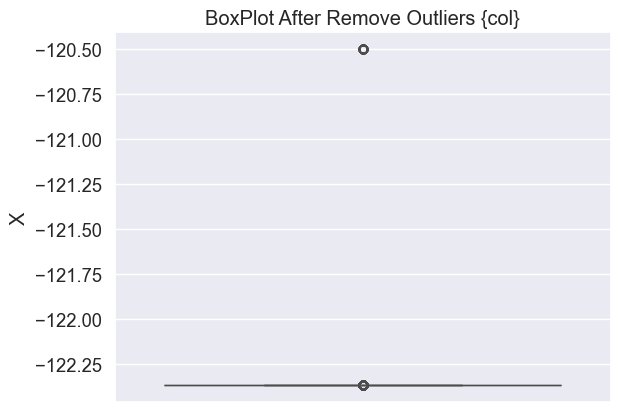

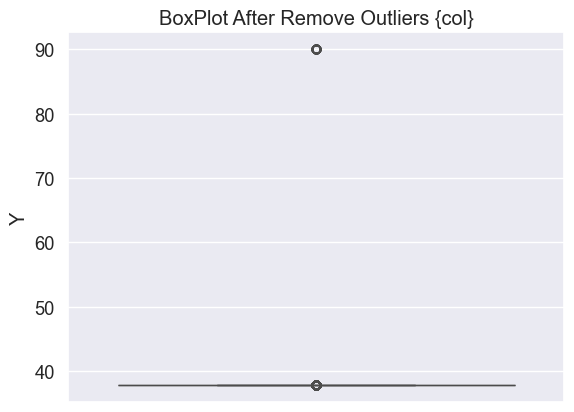

In [9]:
numerical_cols = df_clean.select_dtypes(include=['float64','int64']).columns
for col in numerical_cols:
    sns.boxplot(data=df_clean , y=col)
    plt.title("BoxPlot After Remove Outliers {col}")
    plt.show()

In [10]:
print("عدد الصفوف قبل التنظيف:", len(df))
print("عدد الصفوف بعد التنظيف:", len(df_clean))
print("الفرق:", len(df) - len(df_clean))

عدد الصفوف قبل التنظيف: 878049
عدد الصفوف بعد التنظيف: 1699
الفرق: 876350


In [11]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
String_df = df_clean.select_dtypes(include=['object']).columns
for col in String_df:
    df_clean[col]=LabelEncoder().fit_transform(df_clean[col])

scaler = StandardScaler().fit(df_clean)
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_scaled

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,1.703880,1.127285,1.212972,0.025194,0.104318,0.478839,-0.128882,-0.202961,-0.202628
1,1.701469,-0.288842,-0.175645,0.025194,0.104318,0.478839,-0.128882,-0.202961,-0.202628
2,1.699058,-0.288842,-0.175645,0.025194,0.104318,0.478839,-0.128882,-0.202961,-0.202628
3,1.696647,-0.288842,0.469070,0.025194,0.104318,0.478839,-0.128882,-0.202961,-0.202628
4,1.694236,0.146889,0.105385,-0.466815,0.104318,0.478839,-0.128882,-0.202961,-0.202628
...,...,...,...,...,...,...,...,...,...
1694,-1.707738,0.146889,1.411346,1.501221,0.104318,-1.909031,-0.353006,-0.201232,-0.202576
1695,-1.710149,0.037957,0.072323,1.501221,0.104318,0.478839,-0.353006,-0.201232,-0.202576
1696,-1.712560,-0.070976,0.320290,1.009212,0.104318,0.240052,-0.353006,-0.201232,-0.202576
1697,-1.714971,-0.070976,0.320290,1.009212,0.104318,0.478839,-0.353006,-0.201232,-0.202576
